In [2]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

In [4]:
lens = SampleStrongLens()

# add CDM subhalos; NB same subhalo population for all
lens.add_subhalos(util.unpickle(os.path.join(pickle_dir, 'cdm_subhalos_for_sample')))

oversample = 5
model = lens.get_array(band='F106', num_pix=45 * oversample, side=4.95)

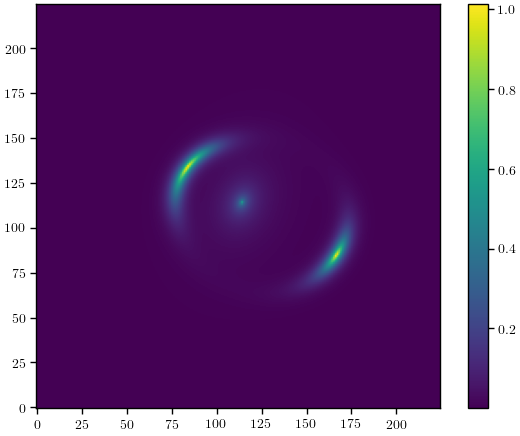

In [5]:
plt.imshow(model)
plt.colorbar()
plt.show()

The `galsim.roman.allDetectorEffects` method (as of version 2.5) applies the following routines (in order):

1. Poisson noise (`PoissonNoise` then `addNoise`)
2. reciprocity failure (`addReciprocityFailure`)
3. dark current (`Deviatenoise` then `add Noise`)
4. persistence, which we don't include since we don't have previous exposures
5. nonlinearity (`applyNonlinearity`)
6. interpixel capacitance (`applyIPC`)
7. read noise (`GaussianNoise` then `addNoise`)